![](https://i.imgur.com/0AUxkXt.png)

# Assignment 3 - From data to insights

Before you explore the data, write down a short list of what you expect to see in the data: the distribution of key variables, the relationships between important pairs of them, and so on. Such a list is essentially a prediction based on your current understanding of the business.

Now analyze the data. Make plots, do summaries, whatever is needed to see if it matches your expectations.

Is there anything that doesn’t match? Anything that makes you go “That’s odd” or “That doesn’t make any sense.”?

Zoom in and try to understand what in your business is making that weird thing show up in the data like that. This is the critical step.

You may have just found an insight into the business and increased your understanding


## The data analysis checklist

This checklist can be used as a guide during the process of a data analysis, or as a way to evaluate the quality of a reported data analysis.

### Answering the first questions

1. Did you define the metric for success before beginning?
2. Did you understand the context for the question and business application?
3. Did you consider whether the question could be answered with the available data?

### Cleaning the data

1. Did you identify the missing data?
2. Is each variable one column?
3. Do different data types appear in each table?
4. Did you try to identify any errors or miscoding of variables?
5. Did you check for outliers?

### Exploratory analysis

1. Did you make univariate plots (histogram, distplot, boxplot)?
2. Did you consider correlations between variables (scatterplot, jointplot, kde plot, correlation matrix)?
3. Did you check the units of all data points to make sure they are in the right range?

### Presentations

1. Did you lead with a brief, understandable to everyone of your problem?
2. Did you explain the data, describe the question of interest?
3. Did you make sure all legends and axes were legible from the back of the room?

## Dataset - Online Retailes Purchase

Typically e-commerce datasets are proprietary and consequently hard to find among publicly available data. However, [The UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php) has made this dataset containing actual transactions from 2010 and 2011. The dataset is maintained on their site, where it can be found by the title "Online Retail".


### Step 1 - Checking the data

**Import tools set**

### Tên: Nguyễn Thị Thúy Nga
### Lớp 2&4

In [141]:
# Your code here
import pandas as pd
from datetime import datetime
from pylab import rcParams
from matplotlib import pyplot as plt
%matplotlib inline

**Import data**

In [142]:
# link = "https://ml101-khanhnguyen.s3-ap-southeast-1.amazonaws.com/devc/Online_Retail.csv"
# Note: set param encoding = 'latin1'
# Your code here
latin1=pd.read_csv('https://ml101-khanhnguyen.s3-ap-southeast-1.amazonaws.com/devc/Online_Retail.csv',header=0,encoding = 'unicode_escape',parse_dates= ['InvoiceDate'])

In [144]:
# Print out First 5 rows from dataframe
# Your code here
latin1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [145]:
# Print out brief info
latin1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


### Step 2 - Cleaning the data

Few of useful data cleaning functions:

* `s.astype('category')` # This will convert the datatype of the series to float *Please note that "s" here is a Pandas Series

* `s.replace(1,'one')` # This will replace all values equal to 1 with 'one'

* `s.replace([1,3],['one','three'])` # This will replace all 1 with 'one' and 3 with 'three'

* `data.rename(columns=lambda x: x + 1)` # Mass renaming of columns

* `data.rename(columns={'oldname': 'new name'})` # Selective renaming

* `data.set_index('column_one')` #  This will change the index

* `data.rename(index=lambda x: x + 1)` # Mass renaming of index

* `data.dropna()` # Remove missing values

* `data.fillna(x)` #  This will replaces all null values with x

* `s.fillna(s.mean())` # This will replace all null values with the mean (mean can be replaced with almost any function from the below section) :

* `data.corr()` # This will return the correlation between columns in a DataFrame

* `data.count()` # This will return the number of non-null values in each DataFrame column

* `data.max()` # This will return the highest value in each column

* `data.min()` # This will return the lowest value in each column

* `data.median()` # This will return the median of each column

* `data.std()` # This will returns the standard deviation of each column


**Check for NaN values**

In [146]:
# Your code here
latin1.isnull().sum() #đếm số giá trị null của từng cột

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

**Examine few examples of NaN values**

In [147]:
# List all NaN values
# danh sách các dòng có giá trị null (cột Description, CustomerID )
latin1[latin1['Description'].isna()|latin1['CustomerID'].isna()] 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,2010-12-01 14:32:00,0.43,NaN,United Kingdom
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,2010-12-01 14:32:00,0.43,NaN,United Kingdom
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,2010-12-01 14:32:00,0.43,NaN,United Kingdom


**Exclude negative Quatity entries**

In [89]:
# loại bỏ giá trị âm trong cột 'Quantity'
latin1=latin1[latin1['Quantity']>0]

**Exclude negative Price entries**

In [148]:
# loại bỏ giá trị âm trong cột UnitPrice
latin1=latin1[latin1['UnitPrice']>0]

#Thay thế các giá trị null tại cột CustomerID bằng giá trị của dòng phía trước do cùng mua 1 hóa đơn
latin1=latin1.fillna(method='ffill') 

### Step 3 - EDA

**The customer with the highest number of orders comes from the United Kingdom (UK)**

In [149]:
# Your code here
latin1_UK=latin1[latin1['Country']=='United Kingdom'] # lấy danh sách các nước thuộc UK
x=latin1_UK.groupby(['CustomerID']) # gom nhóm theo ID
customerID=-1
numberInvoice=-1

# chạy vòng lặp để tìm ra khách hàng có số hóa đơn lớn nhất và lưu vào biến numberInvoice
for name_of_the_group, group in x:
    if group['InvoiceNo'].unique().size>numberInvoice:
        numberInvoice=group['InvoiceNo'].unique().size
        customerID=name_of_the_group


print('CustomerId: ',customerID,'\nNumber of order: ',numberInvoice)

CustomerId:  12748.0 
Number of order:  238


**The customer with the highest money spent on purchases comes from Netherlands**

In [150]:
# Your code here
latin1_Netherlands=latin1[latin1['Country']=='Netherlands'] # lấy danh sách các nước thuộc Netherlands
TotalAmount = latin1_Netherlands['Quantity']*latin1_Netherlands['UnitPrice'] #tính số tiền
latin1_Netherlands.insert(loc=5,column='TotalAmount',value=TotalAmount) # thêm số tiền vừa tính vào cột có vị trí thứ 5 là TotalAmount
latin1_Netherlands_sum=latin1_Netherlands.groupby('CustomerID').sum() # tính tổng số tiền của khách hàng 
latin1_Netherlands_sum.sort_values('TotalAmount',ascending=False).head(1) # sắp xếp theo thứ tự giảm dần và lấy ra cột đầu tiên sẽ là người có số tiền mua nhiều nhất

,Quantity,TotalAmount,UnitPrice
CustomerID,,,
14646.0,196143,279489.02,5400.21


**On which year had the highest sales?**

In [153]:
# Your code here
TotalAmount = latin1['Quantity']*latin1['UnitPrice'] #tính số tiền
latin2=latin1.copy()
latin2.insert(loc=5,column='TotalAmount',value=TotalAmount)  #thêm số tiền vừa tính vào cột có vị trí thứ 5 là TotalAmount
modifed_df = latin2[['Quantity','TotalAmount','InvoiceDate','Country']].copy()
modifed_df['Year'] = modifed_df['InvoiceDate'].dt.year #tạo một cột mới theo năm
date_df=modifed_df.groupby('Year').sum() # tính tổng số tiền theo từng năm
date_df.sort_values('TotalAmount',ascending=False).head(1) # sắp xếp theo thứ tự giảm dần và lấy ra cột đầu tiên sẽ là năm có số tiền mua nhiều nhất

,Quantity,TotalAmount
Year,,
2011,4967605,9.020915e+06


**How many orders (per hour)?**

In [155]:
data_hour=latin1.copy()
data_hour['hour']=latin1['InvoiceDate'].dt.hour #tạo một cột mới theo giờ
data_groupby=data_hour.groupby(['hour']) #gom nhóm theo giờ
df=pd.DataFrame(columns=['hour','count'])
for name_of_the_group, group in data_groupby:
    df=df.append({'hour':name_of_the_group,'count':group['InvoiceNo'].unique().size}, ignore_index=True)
    print(name_of_the_group,'h\tSo don hang:',group['InvoiceNo'].unique().size)


6 h	So don hang: 22
7 h	So don hang: 31
8 h	So don hang: 620
9 h	So don hang: 1718
10 h	So don hang: 2758
11 h	So don hang: 2919
12 h	So don hang: 3718
13 h	So don hang: 3183
14 h	So don hang: 2857
15 h	So don hang: 2737
16 h	So don hang: 1735
17 h	So don hang: 971
18 h	So don hang: 281
19 h	So don hang: 219
20 h	So don hang: 28


**Make a plot about number of orders per hour**

Text(0.5, 0, 'hour')

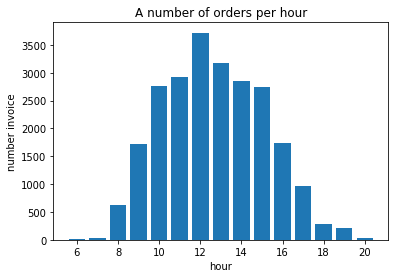

In [156]:
plt.bar(df['hour'], df['count'])
plt.title('A number of orders per hour')
plt.ylabel('number invoice')
plt.xlabel('hour')

**How many orders (per month)?**

In [157]:
data_month=latin1.copy()
data_month['month']=latin1['InvoiceDate'].dt.month #tạo một cột mới theo tháng
data_groupby=data_month.groupby(['month']) # gom nhóm theo giờ
df=pd.DataFrame(columns=['month','count'])
for name_of_the_group, group in data_groupby:
    df=df.append({'month':name_of_the_group,'count':group['InvoiceNo'].unique().size}, ignore_index=True)
    print('Thang',name_of_the_group,':',group['InvoiceNo'].unique().size,'don hang')
   

Thang 1 : 1346 don hang
Thang 2 : 1319 don hang
Thang 3 : 1772 don hang
Thang 4 : 1486 don hang
Thang 5 : 1995 don hang
Thang 6 : 1862 don hang
Thang 7 : 1745 don hang
Thang 8 : 1639 don hang
Thang 9 : 2170 don hang
Thang 10 : 2402 don hang
Thang 11 : 3210 don hang
Thang 12 : 2850 don hang


**Make a plot about number of orders per month**

Text(0.5, 0, 'Month')

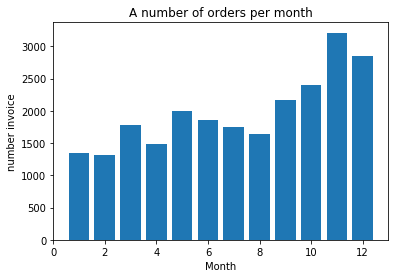

In [158]:
plt.bar(df['month'], df['count'])
plt.title('A number of orders per month')
plt.ylabel('number invoice')
plt.xlabel('Month')

**Top 10 items most sales**

In [159]:

modifed_df = latin1.copy()
modifed_df1 = latin1.copy()
modifed_df1['counts']=modifed_df.groupby('StockCode').size().reset_index(name='counts')['counts'] # gom nhoms và đếm theo StockCode

modifed_df1[['StockCode','Description','counts']].sort_values('counts',ascending=False).head(10) #sắp xếp giảm dần và lấy 10 dòng đầu là top 10

,StockCode,Description,counts
3421,22423,REGENCY CAKESTAND 3 TIER,2307.0
1313,22797,CHEST OF DRAWERS GINGHAM HEART,2198.0
3401,21588,RETROSPOT GIANT TUBE MATCHES,2156.0
2675,22198,LARGE POPCORN HOLDER,1726.0
175,84880,WHITE WIRE EGG HOLDER,1639.0
3202,82494L,WOODEN FRAME ANTIQUE WHITE,1501.0
1112,22242,5 HOOK HANGER MAGIC TOADSTOOL,1476.0
1596,22519,CHILDS GARDEN BRUSH PINK,1473.0
440,21914,BLUE HARMONICA IN BOX,1385.0
177,85099B,JUMBO BAG RED RETROSPOT,1350.0


**Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK**

Text(0.5, 0, 'Country')

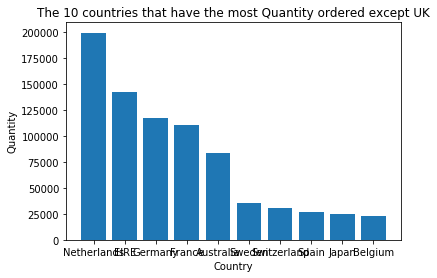

In [160]:
# Your code here
df=latin1[latin1['Country']!='United Kingdom'] #lấy các nước khác UK
df_top10=df.groupby('Country').sum().sort_values('Quantity',ascending=False).head(10) # gom nhóm theo và tính tổng Quantity sau đó sắp xếp  lấy ra top 10
plt.bar(df_top10.index, df_top10['Quantity'])
plt.title('The 10 countries that have the most Quantity ordered except UK')
rcParams['figure.figsize'] = 10, 10
# Your code here')
plt.ylabel('Quantity')
plt.xlabel('Country')
# What can you tell about this?

### You are awesome!!